In [7]:
import covid_feature_extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.statespace.varmax import VARMAX

In [8]:
dates, state_y, state_X, feature_labels = covid_feature_extraction.state_extraction("Population")

C:\Users\mwrep\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


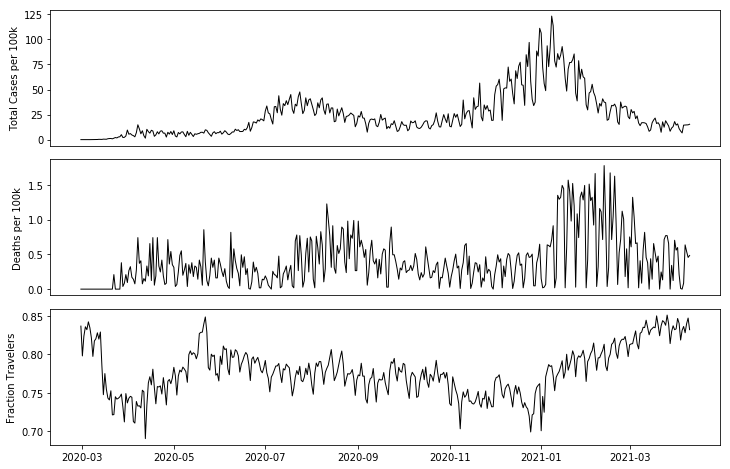

In [9]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates,state_X["total_cases"],color='k',lw=1)
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates,state_X["deaths"],color='k',lw=1)
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates,state_y,color='k',lw=1)
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

In [10]:
# this sees if "total_cases" granger causes state_y
combined_data = pd.concat([state_y.reset_index(drop=True),state_X["total_cases"]],axis=1)
gct = grangercausalitytests(combined_data,maxlag=15,verbose=False)
p_val_dict = {}
for key in gct.keys():
    p_value = gct[key][0]['ssr_ftest'][1]
    p_val_dict[key] = p_value
p_val_dict

{1: 0.016636362873794507,
 2: 0.01566882919432316,
 3: 0.1181464987413141,
 4: 0.013477841584417337,
 5: 0.004781290147764799,
 6: 2.6938902230341052e-11,
 7: 1.7618716598486448e-08,
 8: 2.5082650146553474e-06,
 9: 6.935302587021434e-06,
 10: 1.9357020547096794e-05,
 11: 2.7207725163854524e-05,
 12: 5.4777017637252994e-05,
 13: 1.2441897884758924e-05,
 14: 4.888257278204077e-06,
 15: 9.416816320311779e-05}

In [11]:
# this sees if "total_cases" granger causes state_y
combined_data = pd.concat([state_y.reset_index(drop=True),state_X["deaths"]],axis=1)
gct = grangercausalitytests(combined_data,maxlag=15,verbose=False)
p_val_dict = {}
for key in gct.keys():
    p_value = gct[key][0]['ssr_ftest'][1]
    p_val_dict[key] = p_value
p_val_dict

{1: 0.02212558191019333,
 2: 0.04787417960018308,
 3: 0.2516715081426325,
 4: 0.3791409398029668,
 5: 0.08136250518215676,
 6: 0.0004424545633249673,
 7: 1.526543545899632e-06,
 8: 0.009437192977322525,
 9: 0.041848631061507865,
 10: 0.06847143832288843,
 11: 0.10173117683076763,
 12: 0.12865530728908098,
 13: 0.024223276533779505,
 14: 0.028333611293043234,
 15: 0.16589951089756425}

In [12]:
train_frac = 0.85

In [13]:
vector_data = pd.concat([state_y.reset_index(drop=True),state_X["total_cases"],state_X["deaths"]],axis=1)
vector_data_train = vector_data.iloc[:int(train_frac*len(vector_data)),:]
vector_data_test = vector_data.iloc[int(train_frac*len(vector_data)):,:]
vector_data_train

,Population Not Staying at Home,total_cases,deaths
0,0.836725,0.019012,0.000000
1,0.797960,0.000000,0.000000
2,0.823699,0.009506,0.000000
3,0.835889,0.019012,0.000000
4,0.832086,0.019012,0.000000
...,...,...,...
340,0.801127,47.863605,1.273828
341,0.804939,55.259412,1.321359
342,0.814723,47.046074,0.922099
343,0.796542,43.167554,1.663581


In [14]:
y_stationarity = adfuller(vector_data_train["Population Not Staying at Home"])
y_adf, y_pval = y_stationarity[0], y_stationarity[1]

total_cases_stationarity = adfuller(vector_data_train["total_cases"])
total_cases_adf, total_cases_pval = total_cases_stationarity[0], total_cases_stationarity[1]

death_stationarity = adfuller(vector_data_train["deaths"])
death_adf, death_pval = death_stationarity[0], death_stationarity[1]

print("Y-Value\n------------------------------\nADF Stat: {}\np-value: {}".format(y_adf, y_pval))
print("\nTotal Cases per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(total_cases_adf, total_cases_pval))
print("\nDeaths per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(death_adf, death_pval))

Y-Value
------------------------------
ADF Stat: -3.176242854978842
p-value: 0.021401681430697303

Total Cases per 100k
------------------------------
ADF Stat: -1.9420092297488372
p-value: 0.31256387233984007

Deaths per 100k
------------------------------
ADF Stat: -1.0241894378706191
p-value: 0.7443398464554749


In [15]:
vector_data_diff = vector_data_train.diff().dropna()

In [16]:
y_stationarity = adfuller(vector_data_diff["Population Not Staying at Home"])
y_adf, y_pval = y_stationarity[0], y_stationarity[1]

total_cases_stationarity = adfuller(vector_data_diff["total_cases"])
total_cases_adf, total_cases_pval = total_cases_stationarity[0], total_cases_stationarity[1]

death_stationarity = adfuller(vector_data_diff["deaths"])
death_adf, death_pval = death_stationarity[0], death_stationarity[1]

print("Y-Value\n------------------------------\nADF Stat: {}\np-value: {}".format(y_adf, y_pval))
print("\nTotal Cases per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(total_cases_adf, total_cases_pval))
print("\nDeaths per 100k\n------------------------------\nADF Stat: {}\np-value: {}".format(death_adf, death_pval))

Y-Value
------------------------------
ADF Stat: -4.892011155085184
p-value: 3.614480595725741e-05

Total Cases per 100k
------------------------------
ADF Stat: -3.170396688229487
p-value: 0.02176346413102701

Deaths per 100k
------------------------------
ADF Stat: -6.845913939680307
p-value: 1.7430721690281254e-09


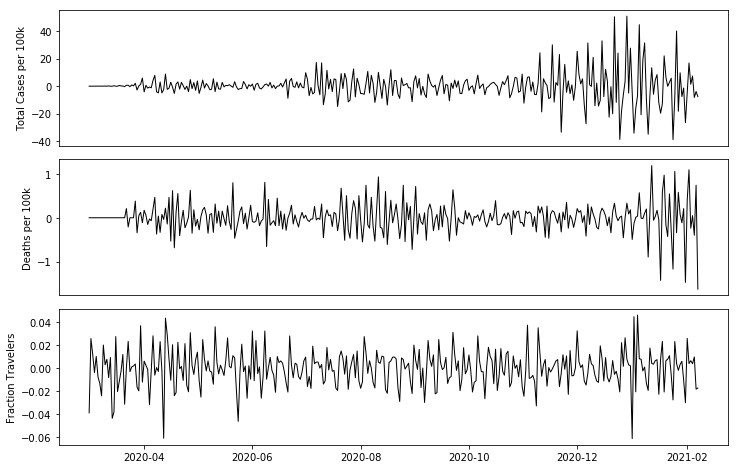

In [17]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[1:int(train_frac*len(vector_data))], vector_data_diff["total_cases"],color='k',lw=1)
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[1:int(train_frac*len(vector_data))], vector_data_diff["deaths"],color='k',lw=1)
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[1:int(train_frac*len(vector_data))], vector_data_diff["Population Not Staying at Home"],color='k',lw=1)
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

In [ ]:
# best_mse = 1e6
# best_params = None
# lag_range = np.arange(1,21,1)
# ma_range = np.arange(1,21,1)
# for i in lag_range:
#     for j in ma_range:
#         model = VARMAX(vector_data_diff,order = (i,j)).fit()
#         start_index = min(i,j)
#         input_data = vector_data_diff.values[-start_index:]

#         forecast = model.forecast(y=input_data, steps=len(vector_data_test))
#         forecast = pd.DataFrame(forecast, index=vector_data.index[-len(vector_data_test):], columns=vector_data.columns)
#         forecast_copy = forecast.copy()

#         cols = vector_data_train.columns
#         for col in cols:        
#             forecast_copy[str(col)+'_forecast'] = vector_data_train[col].iloc[-1] + forecast_copy[str(col)].cumsum()
#         proper_forecast = forecast_copy.iloc[:,3:]
        
#         mse = ((proper_forecast["Population Not Staying at Home_forecast"] - vector_data_test["Population Not Staying at Home"])**2).mean()
#         if mse < best_mse:
#             best_mse = mse
#             best_params = (i,j)
        
# print(best_params)

In [ ]:
# aic_vals = []
# #best_lag = 22

# lag_range = np.arange(1,21,1)
# for i in lag_range:
#     print(i)
#     model = VARMAX(vector_data_diff,order = (i,7)).fit()
#     aic_vals.append(model.aic)
# #     start_index = min(i,j)
# #     input_data = vector_data_diff.values[-start_index:]

# #     forecast = model.forecast(y=input_data, steps=len(vector_data_test))
# #     forecast = pd.DataFrame(forecast, index=vector_data.index[-len(vector_data_test):], columns=vector_data.columns)
# #     forecast_copy = forecast.copy()

# #     cols = vector_data_train.columns
# #     for col in cols:        
# #         forecast_copy[str(col)+'_forecast'] = vector_data_train[col].iloc[-1] + forecast_copy[str(col)].cumsum()
# #     proper_forecast = forecast_copy.iloc[:,3:]

# #     mse = ((proper_forecast["Population Not Staying at Home_forecast"] - vector_data_test["Population Not Staying at Home"])**2).mean()
# #     if mse < best_mse:
# #         best_mse = mse
# #         best_params = (i,j)
        
# fig = plt.figure(figsize=(12,4))

# plt.plot(lag_range, aic_vals, color='k')
# #plt.axvline(best_lag,color='red',linestyle='--',label="Optimal Lag")

# plt.legend()
# plt.show()

In [31]:
model = VARMAX(vector_data_diff,order = (15,7)).fit()
model.aic

C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


401.8433805137863

In [ ]:
# fit_model = VAR(vector_data_diff,dates=dates[1:int(0.95*len(vector_data))]).fit(best_lag)
# fit_model.summary()

In [32]:
durbin_watson(model.resid)

array([1.94376667, 2.00556378, 2.00806856])

In [33]:
lag_num = 15#model.k_ar
input_data = vector_data_diff.values[-lag_num:]

In [34]:
forecast = model.forecast(y=input_data, steps=len(vector_data_test))
forecast = pd.DataFrame(forecast, index=vector_data.index[-len(vector_data_test):], columns=vector_data.columns)

C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\mwrep\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [35]:
forecast_copy = forecast.copy()
cols = vector_data_train.columns
for col in cols:        
    forecast_copy[str(col)+'_forecast'] = vector_data_train[col].iloc[-1] + forecast_copy[str(col)].cumsum()
proper_forecast = forecast_copy.iloc[:,3:]
proper_forecast

,Population Not Staying at Home_forecast,total_cases_forecast,deaths_forecast
345,0.782283,60.147090,0.701613
346,0.785727,57.358393,0.704117
347,0.797359,63.794054,0.760914
348,0.798834,58.756461,0.646705
349,0.781497,54.366460,0.671804
...,...,...,...
402,0.786177,54.033924,0.752309
403,0.785600,56.260936,0.743357
404,0.783632,54.285315,0.660073
405,0.774091,48.629817,0.533978


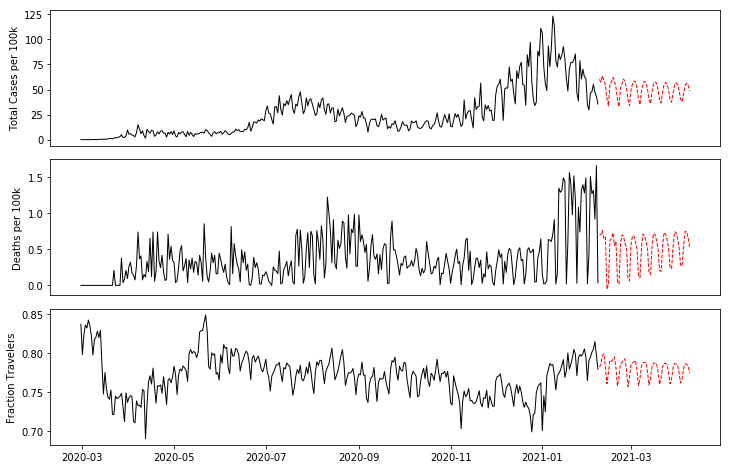

In [36]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["deaths"],color='k',lw=1)
ax[1].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

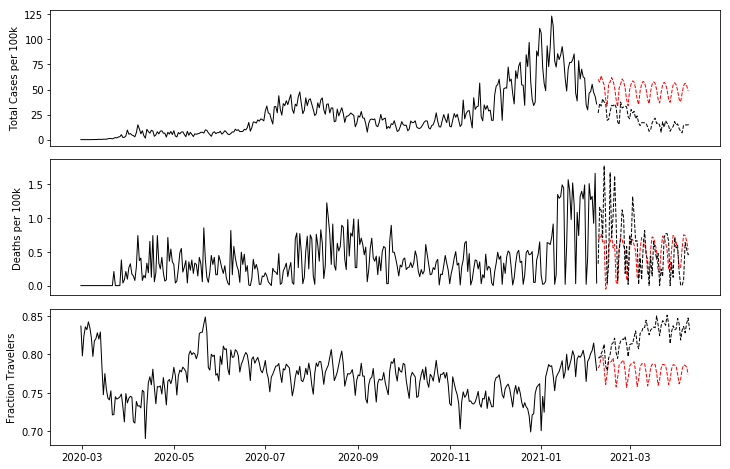

In [37]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["total_cases"],color='k',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["deaths"],color='k',lw=1)
ax[1].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["deaths"],color='k',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[:int(train_frac*len(vector_data))],vector_data_train["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["Population Not Staying at Home"],color='k',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()

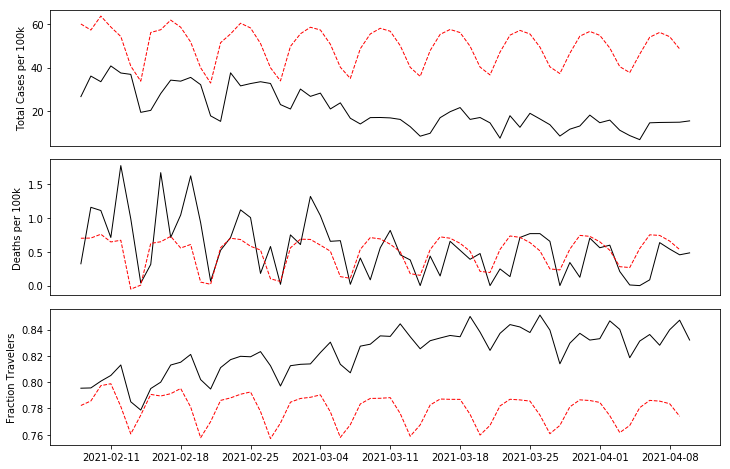

In [38]:
fig, ax = plt.subplots(3,1,figsize=(12,8))

ax[0].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["total_cases"],color='k',lw=1)
ax[0].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["total_cases_forecast"],color='r',lw=1,linestyle='--')
ax[0].tick_params(axis='x',bottom=False,labelbottom=False)
ax[0].set_ylabel("Total Cases per 100k")

ax[1].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["deaths"],color='k',lw=1)
ax[1].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["deaths_forecast"],color='r',lw=1,linestyle='--')
ax[1].tick_params(axis='x',bottom=False,labelbottom=False)
ax[1].set_ylabel("Deaths per 100k")

ax[2].plot(dates[int(train_frac*len(vector_data)):],vector_data_test["Population Not Staying at Home"],color='k',lw=1)
ax[2].plot(dates[int(train_frac*len(vector_data)):],proper_forecast["Population Not Staying at Home_forecast"],color='r',lw=1,linestyle='--')
ax[2].set_ylabel("Fraction Travelers")

plt.subplots_adjust(hspace = 0.1)
plt.show()